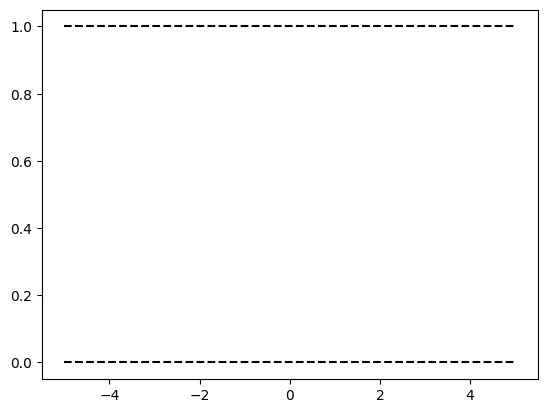

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k--');
plt.plot([-5, 5], [1, 1], 'k--');

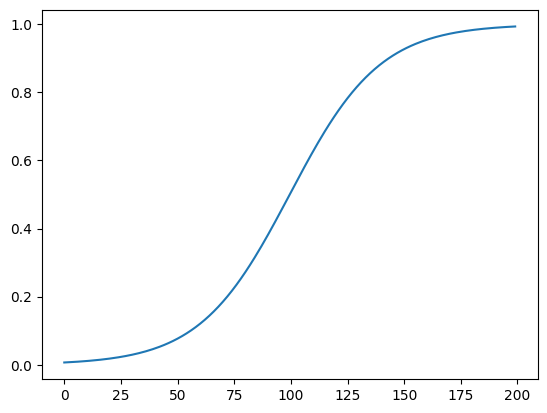

In [2]:
plt.plot(sigmoid(z));

In [ ]:
# Vanishing Gradient Problem
# oscillation deep learning
# Exploting problem

# Xavier and He Initialization





In [3]:
import tensorflow as tf

In [4]:
dense = tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal')

In [5]:
he_avg_init = tf.keras.initializers.VarianceScaling(scale=2, mode='fan_avg', distribution='uniform')
dense = tf.keras.layers.Dense(50, activation="sigmoid", kernel_initializer=he_avg_init)

# Leaky Relu

In [6]:
def leaky_relu(z, alpha):
  return np.maximum(alpha * z, z)

z = np.linspace(-5, 5, 200)

In [7]:
leaky_relu = tf.keras.layers.LeakyReLU(negative_slope=0.2) # defaults to alpha = 0.3
dense = tf.keras.layers.Dense(50, activation=leaky_relu, kernel_initializer='he_normal')

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, kernel_initializer='he_normal'), # no activation
    tf.keras.layers.LeakyReLU(negative_slope=0.2) # activation as a separate layer
])

# ELU

In [9]:
dense = tf.keras.layers.Dense(50, activation='elu', kernel_initializer='he_normal')

# SELU
# ancaq chox deep neural networklerde istifade olunur, amma dense-den bashqa hec bir layer olmamalidi
# data normalized olmalidi, lecun initilizer olmalidi

In [10]:
dense = tf.keras.layers.Dense(50, activation='selu', kernel_initializer='lecun_normal')

In [11]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
  model.add(tf.keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=['accuracy'])

In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
class_names = ["T-shirt/top",
               "Trouser",
               "Pullover",
               "Dress",
               "Coat",
               "Sandal",
               "Shirt",
               "Sneaker",
               "Bag",
               "Ankle boot"
              ]

In [15]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [16]:
history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - accuracy: 0.4449 - loss: 1.4824 - val_accuracy: 0.7198 - val_loss: 0.7932
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.7162 - loss: 0.7860 - val_accuracy: 0.7302 - val_loss: 0.7481
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.7555 - loss: 0.6775 - val_accuracy: 0.7958 - val_loss: 0.5932
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.7856 - loss: 0.6113 - val_accuracy: 0.7206 - val_loss: 0.8561
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.7783 - loss: 0.6512 - val_accuracy: 0.8078 - val_loss: 0.5450


In [17]:
tf.random.set_seed(42)

In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
  model.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.1581 - loss: 2.1548 - val_accuracy: 0.1402 - val_loss: 2.2948
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.2343 - loss: 1.9787 - val_accuracy: 0.3628 - val_loss: 1.6249
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.3703 - loss: 1.5729 - val_accuracy: 0.4642 - val_loss: 1.2549
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.4707 - loss: 1.2873 - val_accuracy: 0.6064 - val_loss: 0.9817
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.5628 - loss: 1.0692 - val_accuracy: 0.6104 - val_loss: 0.9311


# GELU, Swish and Mish

In [21]:
def swish(z, beta=1):
  return z * sigmoid(beta * z)

def approx_gelu(z):
  return swish(z, beta=1.702)

def softplus(z):
  return np.log(1 + np.exp(z))

def mish(z):
  return z * np.tanh(softplus(z))

# Batch Normalization

In [22]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [24]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [25]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7572 - loss: 0.7049 - val_accuracy: 0.8496 - val_loss: 0.4017
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8581 - loss: 0.4032 - val_accuracy: 0.8686 - val_loss: 0.3710


In [26]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, kernel_initializer='he_normal', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(100, kernel_initializer='he_normal', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [28]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7359 - loss: 0.8108 - val_accuracy: 0.8432 - val_loss: 0.4351
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8472 - loss: 0.4406 - val_accuracy: 0.8592 - val_loss: 0.3945


# Gradient Clipping for RNN

In [29]:
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)  #1den balaca olanlara deymir, ondan boyukleri normalize edir
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer)

In [30]:
optimizer = tf.keras.optimizers.SGD(clipnorm=1.0) # butun datani max 1 olmaq sherti ile normalize edir
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer)

# Reusing Petrained Layers

In [31]:
poss_class_id = class_names.index("Pullover")
neg_class_id = class_names.index("T-shirt/top")

def split_dataset(X, y):
  y_for_B = (y == poss_class_id) | (y == neg_class_id)
  y_A = y[~y_for_B]
  y_B = (y[y_for_B] == poss_class_id).astype(np.float32)
  old_class_ids = list(set(range(10)) - set([neg_class_id, poss_class_id]))
  for old_class_id, new_class_id in zip(old_class_ids, range(8)):
    y_A[y_A == old_class_id] = new_class_id # recorder class ids for A
  return ((X[~y_for_B], y_A), (X[y_for_B], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [32]:
tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(8, activation='softmax')
])

model_A.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])
history = model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A))
model_A.save('my_model_A.keras')

Epoch 1/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4715 - loss: 1.6355 - val_accuracy: 0.7641 - val_loss: 0.7667
Epoch 2/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7751 - loss: 0.7000 - val_accuracy: 0.8172 - val_loss: 0.5529
Epoch 3/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8290 - loss: 0.5326 - val_accuracy: 0.8456 - val_loss: 0.4660
Epoch 4/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8504 - loss: 0.4551 - val_accuracy: 0.8576 - val_loss: 0.4181
Epoch 5/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8636 - loss: 0.4095 - val_accuracy: 0.8659 - val_loss: 0.3877
Epoch 6/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8731 - loss: 0.3790 - val_accuracy: 0.8749 - val_loss: 0.3664
Epoch 7/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8791 - loss: 0.3568 - val_accuracy: 0.8782 - val_loss: 0.3506
Epoch 8/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8845 - loss: 0.3399 - 

In [33]:
tf.random.set_seed(42)

model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_B.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])
history = model_B.fit(X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B))
model.evaluate(X_test_B, y_test_B)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6158 - loss: 0.6403 - val_accuracy: 0.6113 - val_loss: 0.6370
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6607 - loss: 0.6148 - val_accuracy: 0.6864 - val_loss: 0.6156
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7108 - loss: 0.5948 - val_accuracy: 0.7507 - val_loss: 0.5981
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7743 - loss: 0.5781 - val_accuracy: 0.7972 - val_loss: 0.5833
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7970 - loss: 0.5634 - val_accuracy: 0.8328 - val_loss: 0.5698
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8712 - loss: 0.5498 - val_accuracy: 0.8487 - val_loss: 0.5576
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8798 - loss: 0.5376 - val_accuracy: 0.8655 - val_loss: 0.5463
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8985 - loss: 0.5263 - val_accuracy: 0.8754 - val_loss: 0.5355


[3.452901840209961, 0.39649999141693115]

In [34]:
model_A = tf.keras.models.load_model('my_model_A.keras')
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1]) # output layeri goturme
model_B_on_A.add(tf.keras.layers.Dense(1, activation='sigmoid')) # onun yerine bunu elave et

In [35]:
tf.random.set_seed(42)

In [36]:
model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights()) # A modelinin clonunu gotururuk ki B_on_A-ni yeniden fit etsek A-nin parametrleri yeniden deyishecek. one gore clone yaradiriq ve A modelinin weightlerini gotururuk

In [37]:
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [38]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = False

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model_B_on_A.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.5699 - loss: 1.4645 - val_accuracy: 0.5321 - val_loss: 0.9408
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6083 - loss: 0.7577 - val_accuracy: 0.7141 - val_loss: 0.5799
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7633 - loss: 0.5073 - val_accuracy: 0.7804 - val_loss: 0.5125
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8113 - loss: 0.4660 - val_accuracy: 0.7864 - val_loss: 0.5008


In [39]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model_B_on_A.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

Epoch 1/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8214 - loss: 0.4540 - val_accuracy: 0.8002 - val_loss: 0.4710
Epoch 2/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8341 - loss: 0.4251 - val_accuracy: 0.8229 - val_loss: 0.4444
Epoch 3/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8701 - loss: 0.3980 - val_accuracy: 0.8417 - val_loss: 0.4212
Epoch 4/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8809 - loss: 0.3746 - val_accuracy: 0.8625 - val_loss: 0.4010
Epoch 5/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8909 - loss: 0.3541 - val_accuracy: 0.8714 - val_loss: 0.3832
Epoch 6/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8909 - loss: 0.3363 - val_accuracy: 0.8813 - val_loss: 0.3675
Epoch 7/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9028 - loss: 0.3207 - val_accuracy: 0.8863 - val_loss: 0.3535
Epoch 8/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9182 - loss: 0.3069 - val_accuracy: 0.8902 - val_loss: 0.3409


In [40]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9153 - loss: 0.2844


[0.2830776870250702, 0.9125000238418579]

In [41]:
def build_model(seed=42):
  tf.random.set_seed(seed)
  return tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[28, 28]),
      tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
      tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
      tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
      tf.keras.layers.Dense(10, activation='softmax')

  ])

def build_and_train_model(optimizer):
  model = build_model()
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

# Momentum

In [42]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9)

In [43]:
history_sgd = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6619 - loss: 0.9967 - val_accuracy: 0.8138 - val_loss: 0.5079
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8319 - loss: 0.4839 - val_accuracy: 0.8278 - val_loss: 0.4633
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8490 - loss: 0.4323 - val_accuracy: 0.8466 - val_loss: 0.4183
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8577 - loss: 0.4016 - val_accuracy: 0.8552 - val_loss: 0.3967
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8646 - loss: 0.3795 - val_accuracy: 0.8562 - val_loss: 0.3863
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8704 - loss: 0.3627 - val_accuracy: 0.8578 - val_loss: 0.3776
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8749 - loss: 0.3486 - val_accuracy: 0.8578 - val_loss: 0.3759
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8790 - loss: 0.3365 - 

# Nesterov Accelerated Gradient

In [44]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov=True)

In [45]:
history_nesterov = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6595 - loss: 1.0236 - val_accuracy: 0.8210 - val_loss: 0.4907
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8305 - loss: 0.4853 - val_accuracy: 0.8382 - val_loss: 0.4412
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8476 - loss: 0.4345 - val_accuracy: 0.8486 - val_loss: 0.4160
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8579 - loss: 0.4040 - val_accuracy: 0.8534 - val_loss: 0.4016
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8647 - loss: 0.3825 - val_accuracy: 0.8542 - val_loss: 0.3929
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8695 - loss: 0.3657 - val_accuracy: 0.8582 - val_loss: 0.3838
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8750 - loss: 0.3517 - val_accuracy: 0.8590 - val_loss: 0.3778
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8790 - loss: 0.3398 

# AdaGrad

In [62]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=1e-3) # her parameter ucun ayrilearning rate yaradir amma global minimuma catmie

In [63]:
history_adagrad = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5478 - loss: 1.3884 - val_accuracy: 0.7782 - val_loss: 0.6676
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7867 - loss: 0.6523 - val_accuracy: 0.8044 - val_loss: 0.5718
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8102 - loss: 0.5722 - val_accuracy: 0.8172 - val_loss: 0.5307
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8211 - loss: 0.5339 - val_accuracy: 0.8252 - val_loss: 0.5066
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8285 - loss: 0.5097 - val_accuracy: 0.8292 - val_loss: 0.4903
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8336 - loss: 0.4928 - val_accuracy: 0.8326 - val_loss: 0.4782
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8375 - loss: 0.4800 - val_accuracy: 0.8350 - val_loss: 0.4686
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8404 - loss: 0.469

# RMSProp

In [65]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-3, rho=0.9)

In [66]:
history_rmsprop = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7608 - loss: 0.6702 - val_accuracy: 0.8358 - val_loss: 0.4305
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8577 - loss: 0.4001 - val_accuracy: 0.8472 - val_loss: 0.4352
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8699 - loss: 0.3677 - val_accuracy: 0.8592 - val_loss: 0.4185
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8746 - loss: 0.3560 - val_accuracy: 0.8500 - val_loss: 0.4750
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8787 - loss: 0.3477 - val_accuracy: 0.8604 - val_loss: 0.4597
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8817 - loss: 0.3424 - val_accuracy: 0.8586 - val_loss: 0.4732
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8826 - loss: 0.3391 - val_accuracy: 0.8616 - val_loss: 0.4572
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8844 - loss: 0.3400 

#Adam Optimization

In [67]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999) # beta_1 -> momentum, beta_2 -> rmsprop; evvelki gradientlerin tesirini azaldir

In [68]:
history_adam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7721 - loss: 0.6515 - val_accuracy: 0.8448 - val_loss: 0.4084
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8581 - loss: 0.3879 - val_accuracy: 0.8498 - val_loss: 0.3871
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8737 - loss: 0.3430 - val_accuracy: 0.8484 - val_loss: 0.3972
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8841 - loss: 0.3137 - val_accuracy: 0.8644 - val_loss: 0.3646
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8913 - loss: 0.2940 - val_accuracy: 0.8728 - val_loss: 0.3482
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8969 - loss: 0.2786 - val_accuracy: 0.8620 - val_loss: 0.3873
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9020 - loss: 0.2628 - val_accuracy: 0.8708 - val_loss: 0.3673
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9060 - loss: 0.2532

# Adamax Optimization

In [69]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999) # beta_1 -> momentum, beta_2 -> rmsprop; evvelki gradientlerin tesirini azaldir

In [70]:
history_adamax = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7733 - loss: 0.6490 - val_accuracy: 0.8302 - val_loss: 0.4337
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8566 - loss: 0.3918 - val_accuracy: 0.8468 - val_loss: 0.4050
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8706 - loss: 0.3481 - val_accuracy: 0.8428 - val_loss: 0.4089
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8814 - loss: 0.3216 - val_accuracy: 0.8512 - val_loss: 0.3855
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8869 - loss: 0.3014 - val_accuracy: 0.8622 - val_loss: 0.3663
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8932 - loss: 0.2832 - val_accuracy: 0.8660 - val_loss: 0.3644
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8987 - loss: 0.2709 - val_accuracy: 0.8710 - val_loss: 0.3641
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9026 - loss: 0.2587

# Nadam

# AdamW Optimization

In [71]:
optimizer = tf.keras.optimizers.AdamW(weight_decay=1e-5, learning_rate=1e-3,
                                      beta_1=0.9, beta_2=0.999)

In [72]:
history_adamw = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7725 - loss: 0.6373 - val_accuracy: 0.8338 - val_loss: 0.4288
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8580 - loss: 0.3871 - val_accuracy: 0.8382 - val_loss: 0.4079
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8725 - loss: 0.3421 - val_accuracy: 0.8430 - val_loss: 0.4128
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8825 - loss: 0.3147 - val_accuracy: 0.8628 - val_loss: 0.3712
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8893 - loss: 0.2967 - val_accuracy: 0.8730 - val_loss: 0.3451
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8937 - loss: 0.2816 - val_accuracy: 0.8562 - val_loss: 0.3911
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9014 - loss: 0.2664 - val_accuracy: 0.8768 - val_loss: 0.3680
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9037 - loss: 0.2568 

# Power Scheduling

In [75]:
# deprecated
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, decay=1e-4)

ImportError: `keras.optimizers.legacy` is not supported in Keras 3. When using `tf.keras`, to continue using a `tf.keras.optimizers.legacy` optimizer, you can install the `tf_keras` package (Keras 2) and set the environment variable `TF_USE_LEGACY_KERAS=True` to configure TensorFlow to use `tf_keras` when accessing `tf.keras`.

In [76]:
# Recommended
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10_000,
    decay_rate=1.0,
    staircase=False
)

optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [77]:
history_power_scheduling = build_and_train_model(optimizer)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6934 - loss: 0.9252 - val_accuracy: 0.8280 - val_loss: 0.4894
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8275 - loss: 0.4916 - val_accuracy: 0.8352 - val_loss: 0.4593
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8464 - loss: 0.4399 - val_accuracy: 0.8440 - val_loss: 0.4419
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8565 - loss: 0.4119 - val_accuracy: 0.8478 - val_loss: 0.4262
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8626 - loss: 0.3931 - val_accuracy: 0.8516 - val_loss: 0.4141
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8666 - loss: 0.3793 - val_accuracy: 0.8548 - val_loss: 0.4046
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8706 - loss: 0.3684 - val_accuracy: 0.8562 - val_loss: 0.3974
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8736 - loss: 0.3590 -

# Exponential Scheduling

# Avoiding Overfitting Through Regularization

In [78]:
layers = tf.keras.layers.Dense(100, activation='relu',
                               kernel_initializer='he_normal',
                               kernel_regularizer=tf.keras.regularizers.l2(0.01))

In [79]:
tf.random.set_seed(42)

In [82]:
from functools import partial

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation='relu',
                           kernel_initializer='he_normal',
                           kernel_regularizer=tf.keras.regularizers.l2(0.01))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(100),
    RegularizedDense(100),
    RegularizedDense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [83]:
optimizer = tf.keras.optimizers.SGD(learning_rate=2e-2)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6997 - loss: 4.0803 - val_accuracy: 0.8244 - val_loss: 1.8615
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8129 - loss: 1.6272 - val_accuracy: 0.8234 - val_loss: 1.1205


# Dropout

In [ ]:
tf.random.set_seed(42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

In [ ]:
# dropout edenden sonra hem train hem test datasetini evaluate etmek lazimdir.
# chunki accuracy-e baxanda neyronlarin mueyyen hissesini atir, amma evaluate edende
# butun neyronlarini istifade edir deye overfit edir

In [ ]:
model.evaluate(X_train, y_train), model.evaluate(X_valid, y_valid), model.evaluate(X_test, y_test)

# MC Dropout - MoneKarlo Dropout

In [ ]:
tf.random.set_seed(42)

In [ ]:
y_probas = np.stack([model(X_test, training=True) for sample in range(100)])
y_proba = y_probas.mean(axis=0)

In [ ]:
# model(X_test) o  demekdir ki predict etsin

In [ ]:
model.predict(X_test[:1].round(3))

In [ ]:
y_proba[0].round(3)

In [ ]:
y_std = y_probas.std(axis=0)
y_std[0].round(3)

In [ ]:
y_pred = y_proba.argmax(axis=1)
accuracy = (y_pred == y_test).sum() / len(y_test)
accuracy

# Max Norm

In [ ]:
dense = tf.keras.layers.Dense(
    100, activation='relu', kernel_initializer="he_normal",
    kernel_constraint=tf.keras.constraints.max_norm(1.)
)

MaxNormDense = partial(tf.keras.layers.Dense,
                       activation='relu', kernel_initializer='he_normal',
                       kernel_constraint=tf.keras.constraints.max_norm(1.0))

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10, activation='softmax')
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer, metrics=["accuracy"])
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))


# Credit Car Fraud Detection

In [ ]:
!kaggle datasets download -d mishra5001/credit-card

Dataset URL: https://www.kaggle.com/datasets/mishra5001/credit-card
License(s): other
 88% 99.0M/112M [00:01<00:00, 86.1MB/s]
100% 112M/112M [00:01<00:00, 98.5MB/s] 


In [ ]:
!unzip /content/credit-card.zip

Archive:  /content/credit-card.zip
  inflating: application_data.csv    
  inflating: columns_description.csv  
  inflating: previous_application.csv  


In [ ]:
import pandas as pd
df = pd.read_csv('/content/application_data.csv')

In [ ]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
df.isna().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [ ]:
X = df.drop('TARGET', axis=1)
y = df['TARGET'].copy()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
num_features = X_train.select_dtypes(include=[np.number]).columns
cat_features = X_train.select_dtypes(exclude=[np.number]).columns

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

transformer = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('object', cat_pipeline, cat_features)
], remainder='passthrough')

estimator = RandomForestClassifier(random_state=42)
full_pipeline = Pipeline([
    ('preprocessing', transformer),
    ('estimator', estimator)
])

In [ ]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_...
                                                  Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object'))])),
                ('estimator', RandomForestClassifier(random_state=42))])

In [ ]:
tf.random.set_seed(42)

card_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
def build_model(seed=42):
  tf.random.set_seed(seed)
  return tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=X_train.shape[1:]),
      tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
      tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
      tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
      tf.keras.layers.Dense(1, activation='sigmoid')

  ])

def build_and_train_model(optimizer):
  card_model = build_model()
  card_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return card_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9)

In [ ]:
card_history_sgd = build_and_train_model(optimizer)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Invalid dtype: object

# Mentor Hours

In [ ]:
# cifar_data = tf.keras.datasets.cifar10.load_data()

In [ ]:
# (X_train_full, y_train_full), (X_test, y_test) = cifar_data
# X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
# X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
# X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

In [ ]:
# class_names = [
#     'airplane',
#     'automobile',
#     'bird',
#     'cat',
#     'deer',
#     'dog',
#     'frog',
#     'horse',
#     'ship',
#     'truck'
# ]

In [ ]:
# pixel_means = X_train.mean(axis=0, keepdims=True)
# pixel_stds = X_train.std(axis=0, keepdims=True)
# X_train_scaled = (X_train - pixel_means) / pixel_stds
# X_valid_scaled = (X_valid - pixel_means) / pixel_stds
# X_test_scaled = (X_test - pixel_means) / pixel_stds

In [ ]:
# tf.random.set_seed(42)

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
# for layer in range(100):
#   tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal')
# model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
# model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=['accuracy'])

In [ ]:
# history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid, y_valid))

# Batch Normalization

In [ ]:
# tf.keras.backend.clear_session()
# tf.random.set_seed(42)

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=[32,32,3]),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(10, activation='softmax'),
# ])

In [ ]:
# [(var.name, var.trainable) for var in model.layers[1].variables]

In [ ]:
# model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

# Gradient Clipping for RNN

In [ ]:
# optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
# model.compile(loss='sparse_categorical_entropy', optimizer=optimizer)

In [ ]:
# optimizer = tf.keras.optimizers.SGD(clipnorm=1.0)
# model.compile(loss='sparse_categorical_entropy', optimizer=optimizer)

# Reusing Petrained Layers

In [ ]:
# poss_class_id = class_names.index("automobile")
# neg_class_id = class_names.index("truck")

# def split_dataset(X, y):
#   y_for_B = (y == poss_class_id) | (y == neg_class_id)
#   y_for_B = np.squeeze(y_for_B)
#   y_A = y[~y_for_B]
#   y_B = (y[y_for_B] == poss_class_id).astype(np.float32)
#   old_class_ids = list(set(range(10)) - set([neg_class_id, poss_class_id]))
#   for old_class_id, new_class_id in zip(old_class_ids, range(8)):
#     y_A[y_A == old_class_id] = new_class_id # recorder class ids for A
#   return ((X[~y_for_B], y_A), (X[y_for_B], y_B))

# (X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
# (X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
# (X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
# X_train_B = X_train_B[:200]
# y_train_B = y_train_B[:200]

In [ ]:
# tf.random.set_seed(42)

# model_A = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=[32, 32, 3]),
#     tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
#     tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
#     tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
#     tf.keras.layers.Dense(8, activation='softmax')
# ])

# model_A.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
#                 metrics=['accuracy'])
# history = model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A))
# model_A.save('my_model_A.keras')

In [ ]:
# tf.random.set_seed(42)

# model_B = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=[32, 32, 3]),
#     tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
#     tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
#     tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# model_B.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
#                 metrics=['accuracy'])
# history = model_B.fit(X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B))
# model_B.evaluate(X_test_B, y_test_B)

In [ ]:
# model_A = tf.keras.models.load_model('my_model_A.keras')
# model_B_on_A = tf.keras.Sequential(model_A.layers[:-1]) # output layeri goturme
# model_B_on_A.add(tf.keras.layers.Dense(1, activation='sigmoid')) # onun yerine bunu elave et

In [ ]:
# tf.random.set_seed(42)

In [ ]:
# model_A_clone = tf.keras.models.clone_model(model_A)
# model_A_clone.set_weights(model_A.get_weights()) # A modelinin clonunu gotururuk ki B_on_A-ni yeniden fit etsek A-nin parametrleri yeniden deyishecek. one gore clone yaradiriq ve A modelinin weightlerini gotururuk

In [ ]:
# model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
# model_B_on_A.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
# for layer in model_B_on_A.layers[:-1]:
#   layer.trainable = False

# optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
# model_B_on_A.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B))

In [ ]:
# for layer in model_B_on_A.layers[:-1]:
#   layer.trainable = True

# optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
# model_B_on_A.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

In [ ]:
# model_B_on_A.evaluate(X_test_B, y_test_B)